In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
##https://www.crummy.com/software/BeautifulSoup/bs4/doc/
# get (..) : receive an URL
# return the web page as a Response object
response_prince = requests.get ('https://www.gutenberg.org/files/1232/1232-h/1232-h.htm')
response_metamorphosis = requests.get ('https://www.gutenberg.org/files/5200/5200-h/5200-h.htm')

# gives back the page ’s HTML -> content
response_prince.content
response_metamorphosis.content

soup_prince = BeautifulSoup( response_prince.content , 'html5lib' )
soup_metamorphosis = BeautifulSoup( response_metamorphosis.content , 'html5lib' )

# the text without the structural information
text_prince = soup_prince.get_text( strip = True ) # text without tags
text_metamorphosis = soup_metamorphosis.get_text( strip = True ) # text without tags

In [3]:
##https://www.nltk.org/index.html
from nltk.corpus import stopwords
stops = stopwords.words('english')

from textblob import TextBlob

blob_prince = TextBlob(text_prince)
blob_metamorphosis = TextBlob(text_metamorphosis)

# remove the stop words
blob_prince_wnsw = [ word for word in blob_prince.words if word not in stops ]
blob_metamorphosis_wnsw = [ word for word in blob_metamorphosis.words if word not in stops ]


In [4]:
##https://pypi.org/project/textatistic/
from pathlib import Path
text_prince = Path ('prince.txt').read_text()
text_metamorphosis = Path ('metamorphosis.txt').read_text()

from textatistic import Textatistic
readability_prince = Textatistic ( text_prince )
readability_metamorphosis = Textatistic ( text_metamorphosis )

##https://yoast.com/flesch-reading-ease-score/

##Readability_prince: The number of: characters in this text is 248435, of words is 53224, of sentences is 1571, of syllables 70768.
##11392 out of 53224 words that are not on the Dale-Chall list, which is a list of words understood by 80% of 5th graders.
##3684 words with three or more syllables, The Flesch Reading Ease score is 59.96 (=60) which falls between two ranges;
##easily understood by 13- to 15-year-old students and fairly difficult to read. 13.31 corresponds to the grade level that can read this book.
##The function of gunningfog_score is similar to fleschkincaid_score. 11.87 corresponds to the years of education required to understand text.
##The Dale-Chall score, which can be mapped to grade levels from 4 and below to college graduate (grade 16) and above. Here we have 8.69.
##This score considered to be most reliable for a broad range of text types.
print('readability_prince:', readability_prince.dict ())


##Readability_metamorphosis: The number of: characters in this text is 113119, of words is 25269, of sentences is 1018, of syllables 31957.
##3653 out of 25269 words that are not on the Dale-Chall list, which is a list of words understood by 80% of 5th graders.
##1201 words with three or more syllables, The Flesch Reading Ease score is 74.64 which falls the fairly easy to read range.
##9.01 corresponds to the grade level that can read this book.
##The function of gunningfog_score is similar to fleschkincaid_score. 9.33 corresponds to the years of education required to understand text.
##The Dale-Chall score, which can be mapped to grade levels from 4 and below to college graduate (grade 16) and above. Here we have 7.15.
##This score considered to be most reliable for a broad range of text types.
print('readability_metamorphosis:', readability_metamorphosis.dict ())

readability_prince: {'char_count': 248435, 'word_count': 53224, 'sent_count': 1571, 'sybl_count': 70768, 'notdalechall_count': 11392, 'polysyblword_count': 3684, 'flesch_score': 59.96141921540688, 'fleschkincaid_score': 13.312416237181832, 'gunningfog_score': 16.320298955315433, 'smog_score': 11.877258721608769, 'dalechall_score': 8.696573601347435}
readability_metamorphosis: {'char_count': 113119, 'word_count': 25269, 'sent_count': 1018, 'sybl_count': 31957, 'notdalechall_count': 3653, 'polysyblword_count': 1201, 'flesch_score': 74.64920458052107, 'fleschkincaid_score': 9.013789262505966, 'gunningfog_score': 11.830023851025054, 'smog_score': 9.334110925015988, 'dalechall_score': 7.150354375470041}


In [5]:
##https://spacy.io/
# pip install -U spacy
# python -m spacy download en_core_web_sm
import spacy

# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

# Process whole documents
doc_prince = nlp(text_prince)
doc_metamorphosis = nlp(text_metamorphosis)


# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc_prince.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc_prince if token.pos_ == "VERB"])

print("Noun phrases:", [chunk.text for chunk in doc_metamorphosis.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc_metamorphosis if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc_prince.ents:
    print(entity.text, entity.label_)

for entity in doc_metamorphosis.ents:
    print(entity.text, entity.label_)

Noun phrases: ['\ufeffThe Project Gutenberg eBook', 'The Prince', 'Nicolo Machiavelli', 'This eBook', 'the use', 'anyone', 'the United States', 'most other parts', 'the world', 'no cost', 'almost no restrictions', 'You', 'it', 'it', 'it', 'the terms', 'the Project Gutenberg License', 'this eBook', 'www.gutenberg.org', 'you', 'the United States', 'you', 'the laws', 'the country', 'you', 'this eBook', 'Title', 'The Prince', 'Author', 'Nicolo Machiavelli', 'Translator', 'W. K. Marriott', 'Release Date', 'March', 'Language', 'English\n\nCharacter', 'encoding', 'John Bickers', 'David Widger', 'Others', '* START', 'THE PROJECT GUTENBERG', 'EBOOK', 'THE PRINCE', 'The Prince', 'Nicolo Machiavelli', 'W. K. Marriott', 'Contents', 'YOUTH', '-25—1469-94\n OFFICE', 'Æt', '25-43—1494-1512\n LITERATURE', 'DEATH Æt', 'THE MAN', 'HIS WORKS\n DEDICATION', 'THE PRINCE\n CHAPTER I. HOW', 'MANY KINDS', 'PRINCIPALITIES', 'THERE', 'WHAT', 'THEY', 'ACQUIRED\n CHAPTER II', 'MIXED PRINCIPALITIES\n CHAPTER IV', 

In [6]:
from pathlib import Path

prince = nlp ( Path ('prince.txt') . read_text ())
metamorphosis = nlp ( Path ('metamorphosis.txt') . read_text() )

prince.similarity ( metamorphosis )
##They are very similar.

/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.9637602060717843

In [7]:
# get word frequencies
items = blob_prince.word_counts.items ()
# eliminate stop words
items = [ item for item in items if item [0] not in stops ]

# sort words by frequency
from operator import itemgetter
sorted_items = sorted ( items , key = itemgetter (1) , reverse = True )
top_prince_10 = sorted_items [0:10]
df_prince = pd.DataFrame( top_prince_10 , columns =[ 'word', 'count'])
df_prince

,word,count
0,one,304
1,prince,209
2,would,165
3,men,163
4,castruccio,140
5,“,139
6,”,139
7,people,113
8,may,111
9,many,104


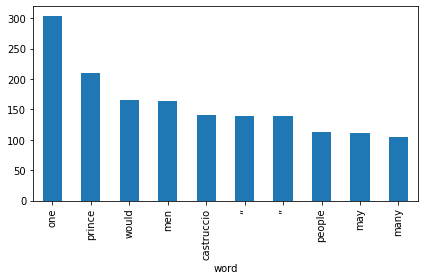

In [8]:
axes = df_prince.plot.bar( x ='word', y ='count', legend = False )

import matplotlib.pyplot as plt

plt.gcf().tight_layout()


In [9]:
# get word frequencies
items = blob_metamorphosis.word_counts.items ()
# eliminate stop words
items = [ item for item in items if item [0] not in stops ]

# sort words by frequency
from operator import itemgetter
sorted_items = sorted ( items , key = itemgetter (1) ,
reverse = True )
top_metamorphosis_10 = sorted_items [1:11]
df_metamorphosis = pd.DataFrame( top_metamorphosis_10 , columns =[ 'word', 'count'])
df_metamorphosis

,word,count
0,gregor,286
1,would,186
2,“,142
3,”,142
4,room,126
5,could,119
6,father,102
7,sister,101
8,project,88
9,mother,88


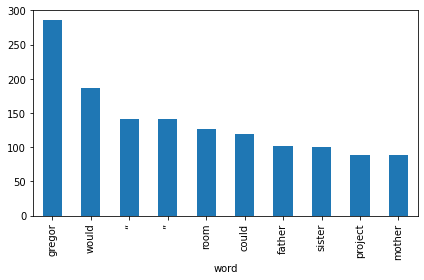

In [10]:
axes = df_metamorphosis.plot.bar( x ='word', y ='count', legend = False )

import matplotlib.pyplot as plt


plt.gcf().tight_layout()